In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("BIPA_data.csv", index_col = 0)

In [3]:
data['wardPlaced']

0          5
1          6
2          7
3          5
4          5
          ..
999995    29
999996     8
999997    13
999998    11
999999    15
Name: wardPlaced, Length: 1000000, dtype: int64

In [4]:
df1 = data.replace('WIN', "1")

In [5]:
df2 = df1.replace('LOSE', "0")

In [6]:
idx = df2[df2['result'] == "UNKNOWN"].index
df2.drop(idx, inplace = True)

In [7]:
df2["result"] = pd.to_numeric(df2["result"])

In [8]:
ward_result = df2[['wardPlaced', 'result']]
ward_result

,wardPlaced,result
0,5,1
1,6,0
2,7,1
3,5,1
4,5,1
...,...,...
999995,29,1
999996,8,1
999997,13,0
999998,11,1


In [9]:
data1 = ward_result[ward_result['wardPlaced'].isin(range(0,40))]
group1 = data1.groupby("wardPlaced", as_index = False).mean()

In [10]:
group1

,wardPlaced,result
0,0,0.381190
1,1,0.424579
2,2,0.456473
3,3,0.471590
4,4,0.477548
5,5,0.486360
6,6,0.494214
7,7,0.498553
8,8,0.504880
9,9,0.512998


Text(0, 0.5, 'win_rate')

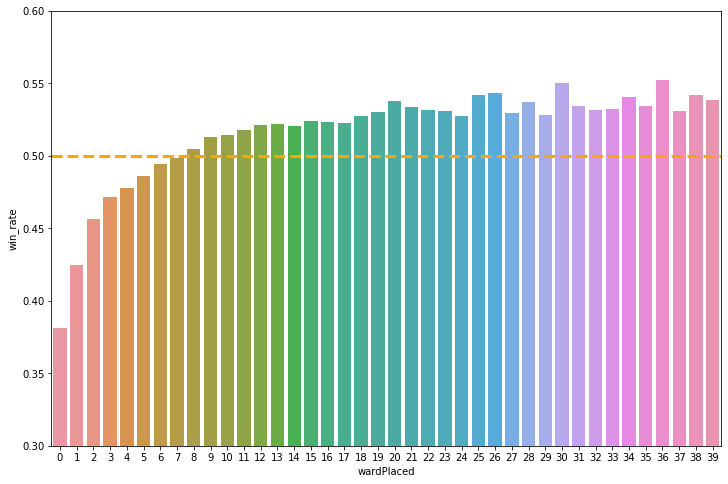

In [21]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.barplot(data = group1, x = 'wardPlaced', y = 'result').set_ylim(0.30, 0.60)

ax.axhline(0.5, ls = '--', lw = 3, color = 'orange')

ax.set_xlabel('wardPlaced')
ax.set_ylabel('win_rate')